In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

####
 LEcture csv
####

In [3]:
## read csv
donnee = pd.read_csv("./data/ozone.csv")
stats=donnee.describe()
dimensions=donnee.shape
stats

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,11.775758,5750.484848,4.890909,58.130303,61.754545,2572.875758,17.369697,161.160606,124.533333,181.727273
std,8.011277,105.708241,2.293159,19.865000,14.458737,1803.885870,35.717181,76.679424,79.362393,106.060593
min,1.000000,5320.000000,0.000000,19.000000,25.000000,111.000000,-69.000000,-25.000000,0.000000,3.000000
25%,5.000000,5690.000000,3.000000,47.000000,51.000000,877.500000,-9.000000,107.000000,70.000000,90.250000
50%,10.000000,5760.000000,5.000000,64.000000,62.000000,2112.500000,24.000000,167.500000,120.000000,177.500000
75%,17.000000,5830.000000,6.000000,73.000000,72.000000,5000.000000,44.750000,214.000000,150.000000,275.750000
max,38.000000,5950.000000,21.000000,93.000000,93.000000,5000.000000,107.000000,332.000000,350.000000,365.000000


In [4]:
donnee.isnull().sum()

ozone       0
vh          0
wind        0
humidity    0
temp        0
ibh         0
dpg         0
ibt         0
vis         0
doy         0
dtype: int64

#### 

séparation variables X et y

####

In [5]:
col_y = "ozone"

# var dépendente
dfY = donnee[col_y].copy() 

## seulement les variables X
dfX = donnee.loc[:, ~donnee.columns.isin([col_y])].copy()

###

Voyons à quoi semble notre dataframe

###

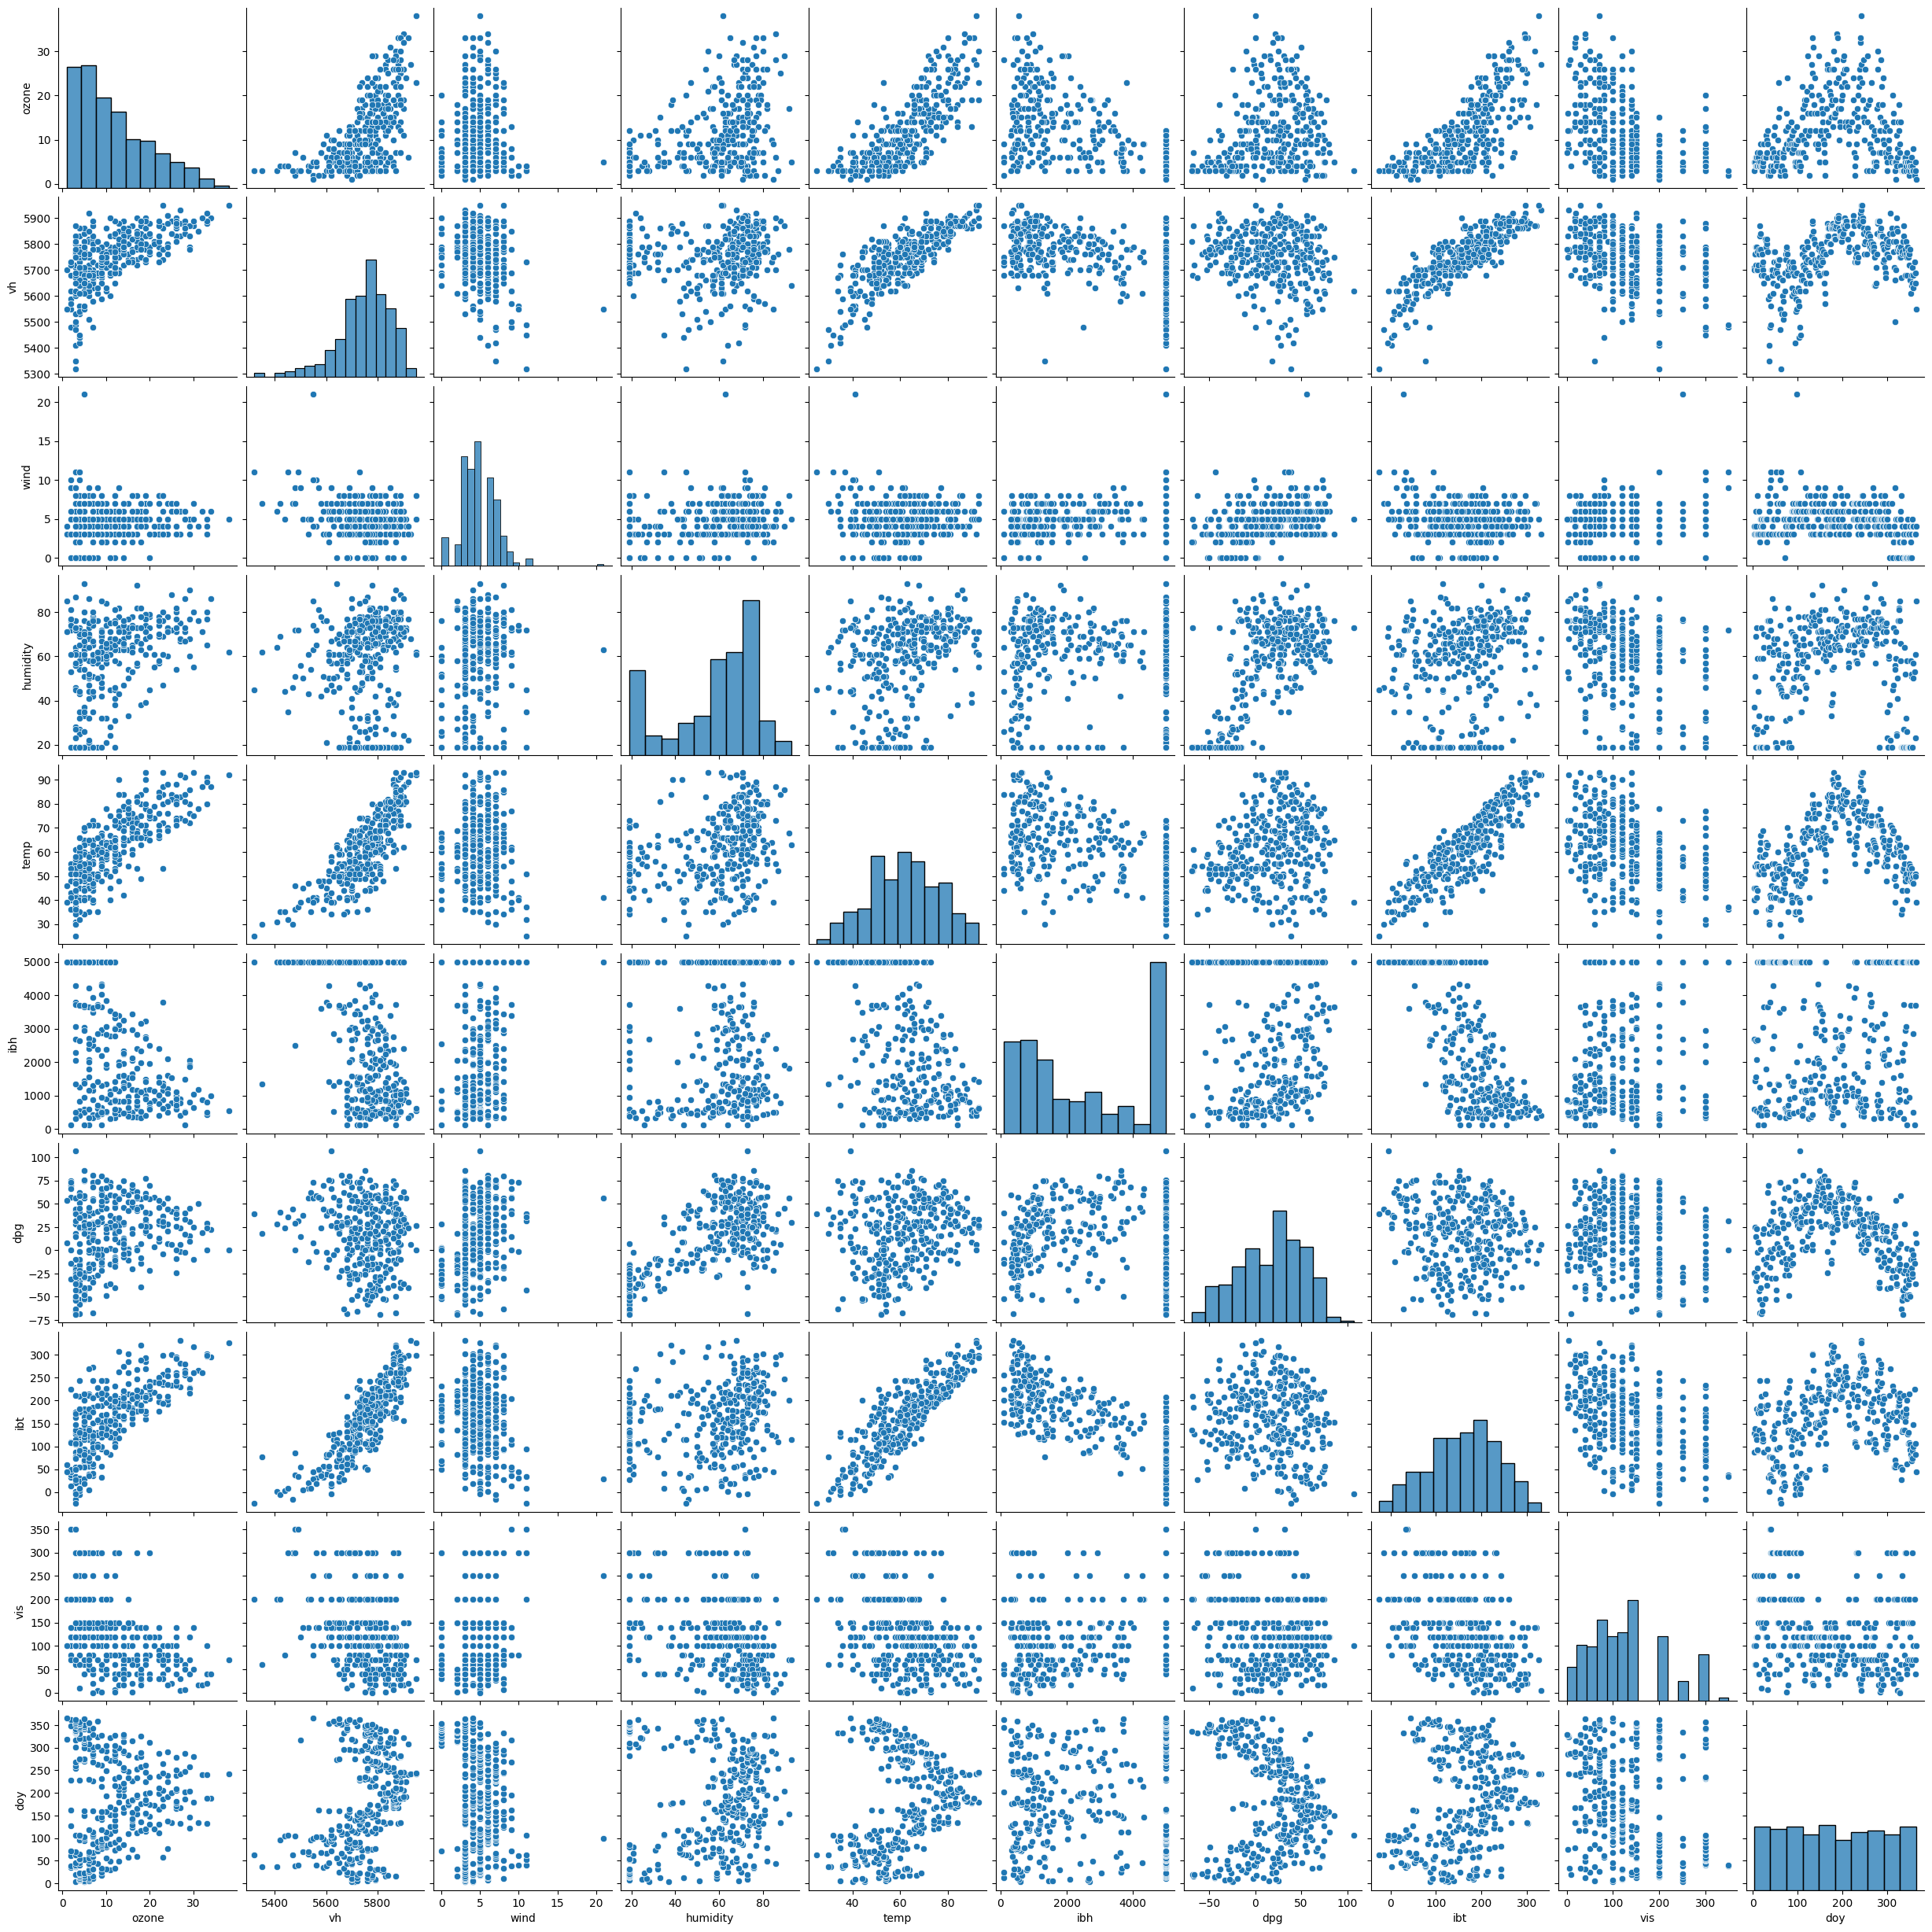

In [6]:
sns.pairplot(donnee)

###
"Visuellement", temp et ibt semble des bonnes candidates pour estimer ozone
###

###

Regardons la matrice de correlation

###

<AxesSubplot: >

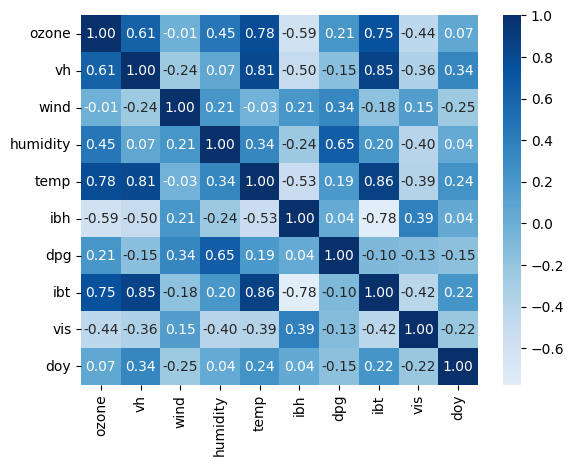

In [7]:
sns.heatmap(donnee.corr(), cbar=True, center=0, annot=True, fmt="0.2f", cmap="Blues")

###

On voit que vh, temp et ibt sont hautement correlés avec ozone. Ça corrobore la première impression visuelle.
Au même, vh, temp et ibt sont hautement correlées entre elles

###

###

Essayons un  premier modèle

https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html

###

In [59]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [60]:
def evaluate_linear_reg(pDfX, pDfY, pDescription="", nbDecimal=3, pModel = LinearRegression()):
    print("------------------")
    print("[pDescription]: ", pDescription)
    print("------------------")
    X_train, X_test, y_train, y_test = train_test_split(pDfX, pDfY, test_size=0.2, random_state=0)
    
   
    
    #regressor = LinearRegression()
    pModel.fit(X_train, y_train)
    
    

    #To retrieve the intercept:
    print("[Intercept]: ")
    print(round(pModel.intercept_, nbDecimal))

    #For retrieving the slope:
    print("[Coefficients]")
    print(list(zip(pDfX.columns.values, pModel.coef_)))
    
       
    y_pred = pModel.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    
    df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred}) 
    
    p = sns.scatterplot(x=y_test, y=y_pred)
    p.set_xlabel("predicted")
    p.set_ylabel("actual")
    
    ## Draw a line of x=y 
    #x0, x1 = g.ax_joint.get_xlim()
    #y0, y1 = g.ax_joint.get_ylim()
    #lims = [max(x0, y0), min(x1, y1)]
    
    

    
    print('Mean Absolute Error - [MAE]:', round(metrics.mean_absolute_error(y_test, y_pred), nbDecimal) )  
    print('Mean Squared Error - [MSE]:', round(metrics.mean_squared_error(y_test, y_pred),nbDecimal ) )  
    print('Root Mean Squared Error - [RMSE]:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),nbDecimal) )
    print('[R2]:', round(r2_score(y_test, y_pred), nbDecimal) )  

------------------
[pDescription]:  Premier essai
------------------
[Intercept]: 
-14.956
[Coefficients]
[('temp', 0.4315562420042498)]
Mean Absolute Error - [MAE]: 4.008
Mean Squared Error - [MSE]: 26.916
Root Mean Squared Error - [RMSE]: 5.188
[R2]: 0.565


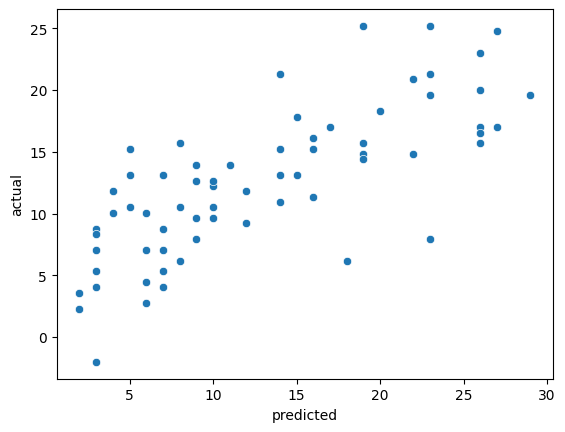

In [61]:
## premier essai - prenons la variables la plus hautement corrélées ('temp')
evaluate_linear_reg(dfX['temp'].to_frame(), dfY, "Premier essai" )

['temp']
------------------
[pDescription]:  Premier essai
------------------
[Intercept]: 
11.695
[Coefficients]
[('temp', 6.23029677452767)]
Mean Absolute Error - [MAE]: 4.008
Mean Squared Error - [MSE]: 26.916
Root Mean Squared Error - [RMSE]: 5.188
[R2]: 0.565


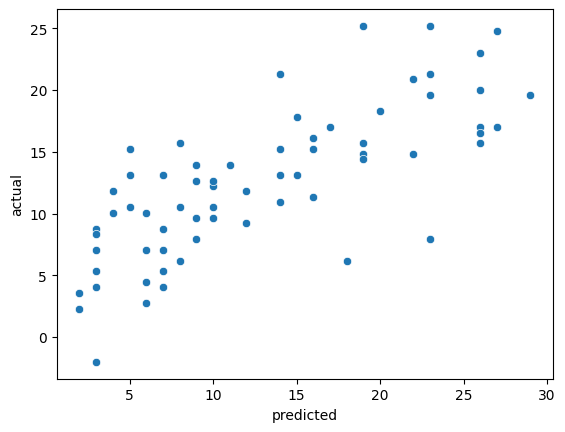

In [90]:
## scale
scaler = StandardScaler()
type(dfX['temp'])
print(dfX['temp'].to_frame().columns.values)

x = scaler.fit_transform(dfX['temp'].to_frame())
type(x)
#col_series=pd.Series(x)
dfX_scale = pd.DataFrame(x, columns=['temp'])

evaluate_linear_reg(dfX_scale, dfY, "Premier essai" )
    

------------------
[pDescription]:  Premier essai
------------------
[Intercept]: 
39.98
[Coefficients]
[('vh', -0.006000797148308151), ('wind', -0.04480825712514977), ('humidity', 0.08499397861569283), ('temp', 4.117564606426232), ('ibh', -0.0001243188324403302), ('dpg', -0.00678976705248948), ('ibt', 0.029350656032339037), ('vis', -0.008317877677126483), ('doy', -0.009069642983031367)]
Mean Absolute Error - [MAE]: 3.706
Mean Squared Error - [MSE]: 20.323
Root Mean Squared Error - [RMSE]: 4.508
[R2]: 0.671


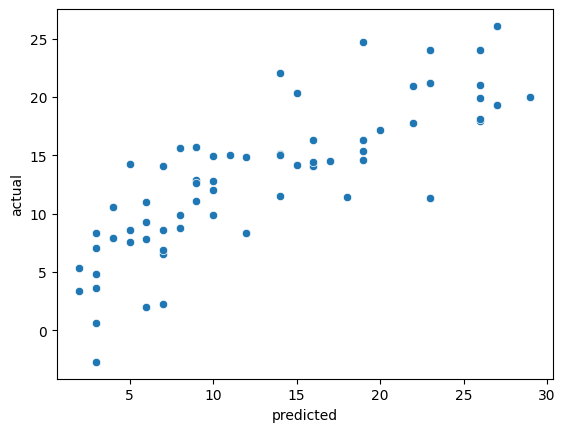

In [91]:
## pdeuxième - si on fait une régression multilinéaire
evaluate_linear_reg(dfX, dfY, "Premier essai" )